# Loading

In [79]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [80]:
import pandas as pd

# load education data
df = pd.read_csv('fr.openfoodfacts.org.products.nutriscore.processed.csv', sep=',', index_col=[0], decimal='.')

In [81]:
txt_columns = ["product_name"]

cat_columns = [
    "main_category_fr", "main_category",
    "categories_fr", "categories", "categories_tags", 
    "pnns_groups_1", "pnns_groups_2",
    "countries", "brands", 
]

nutrition_columns = [
    "nutrition_grade_fr", 'nutrition-score-fr_100g', 'nutrition-score-uk_100g', 'nutriscore'
]

quantity_columns = [
    "fat_100g", "saturated-fat_100g", "fruits-vegetables-nuts_100g",
    "sugars_100g", "sodium_100g", "fiber_100g",
    "energy_100g", "proteins_100g",
]

created_columns = [
    "is_water",
    "is_beverage",
    "palm_oil_n", 
    "allergens_n", 
    "additives_n",
    "is_label_bio", 
    "packaging_coef",
]

# Univariate analysis 

In [82]:
df_quant = df[quantity_columns].astype(float, errors = 'raise')

tab = df_quant.describe(percentiles=[.25, .75])

tab.loc["IQR"] = df_quant.apply(
    lambda col: col.quantile(0.75) - col.quantile(0.25), axis = 0)
tab.loc["VAR"] = df_quant[pd.notnull(df_quant)].var()
tab.loc["SKEW"] = df_quant.skew()
tab.loc["KURT"] = df_quant.kurtosis()

tab

,fat_100g,saturated-fat_100g,fruits-vegetables-nuts_100g,sugars_100g,sodium_100g,fiber_100g,energy_100g,proteins_100g
count,62667.000000,62667.000000,5752.000000,62667.000000,62667.000000,62667.000000,62667.000000,62667.000000
mean,13.881685,5.411173,67.660217,13.338240,0.462472,3.079646,1116.251988,7.746842
std,16.769760,8.469789,41.541469,18.966645,1.677886,4.305411,779.908850,7.875603
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.300000,0.300000,23.000000,1.000000,0.031496,0.259000,429.000000,1.800000
50%,8.000000,2.000000,100.000000,4.000000,0.224409,2.000000,1034.000000,6.000000
75%,22.000000,7.400000,100.000000,17.500000,0.500000,4.343227,1651.000000,10.900000
max,149.642855,100.000000,100.000000,100.000000,83.000000,100.000000,5481.000000,100.000000
IQR,20.700000,7.100000,77.000000,16.500000,0.468504,4.084228,1222.000000,9.100000
VAR,281.224843,71.737329,1725.693640,359.733626,2.815303,18.536560,608257.814014,62.025129


# Outliers deletion on continuous variables

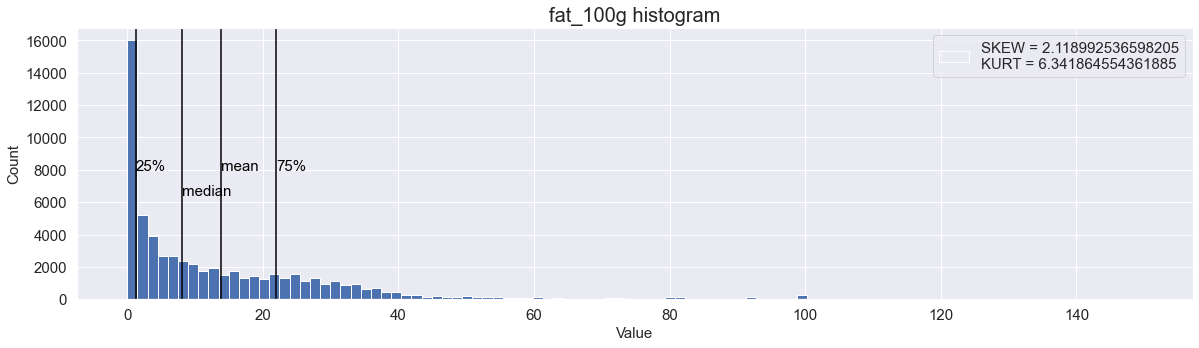

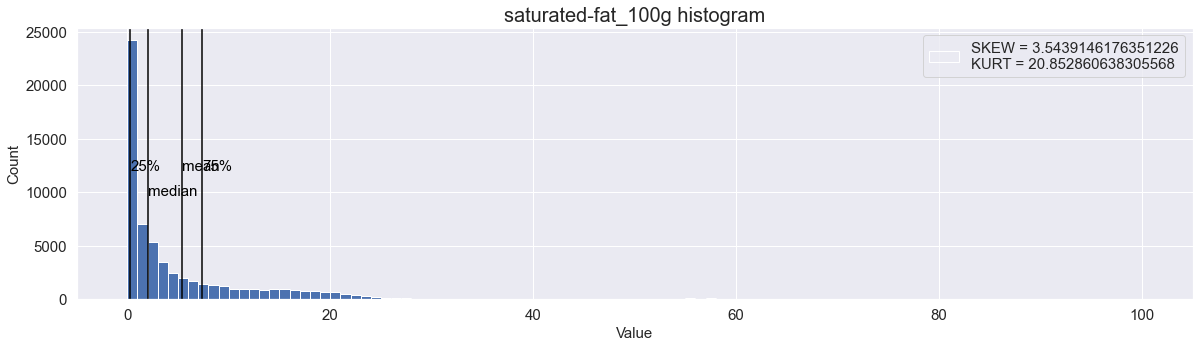

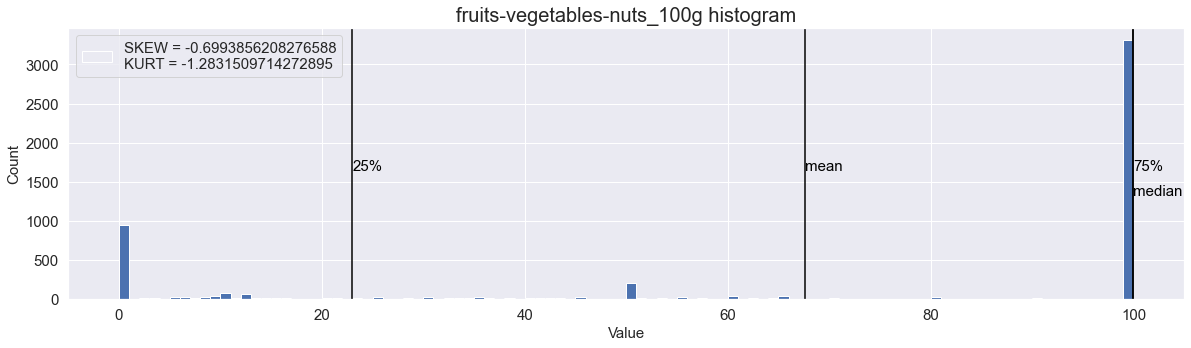

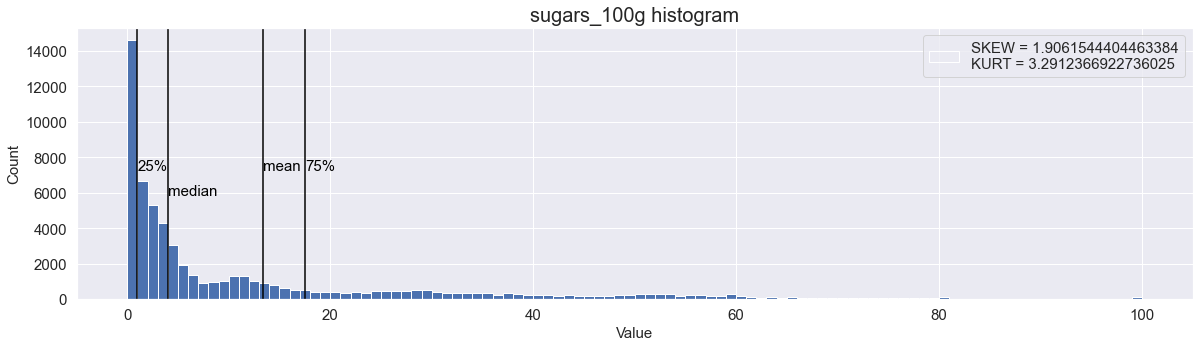

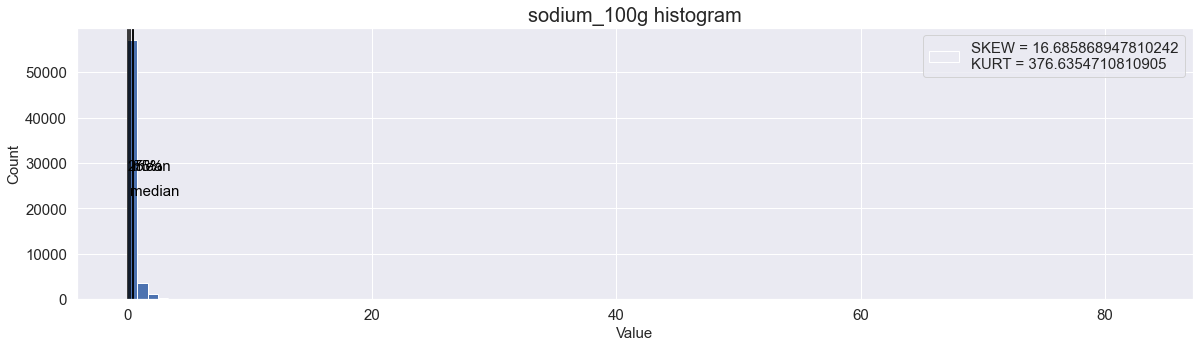

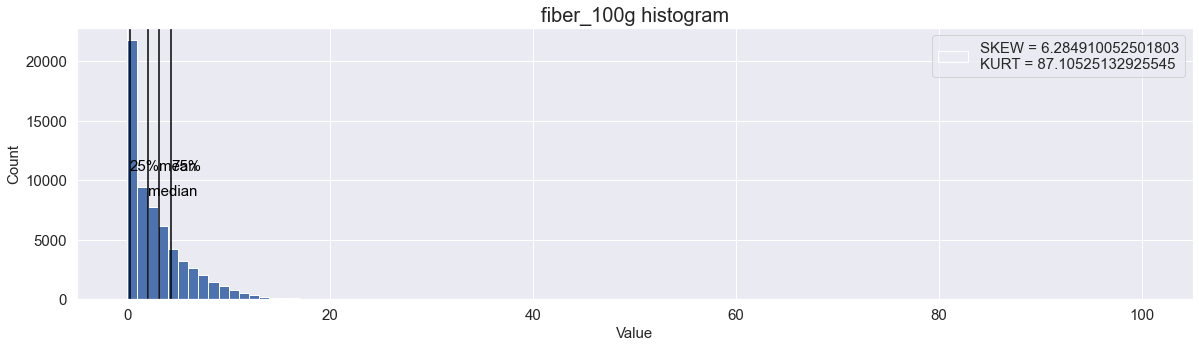

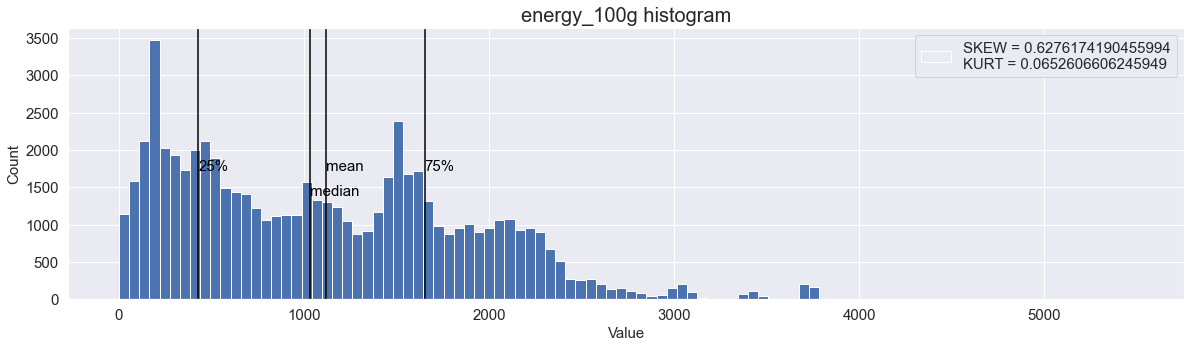

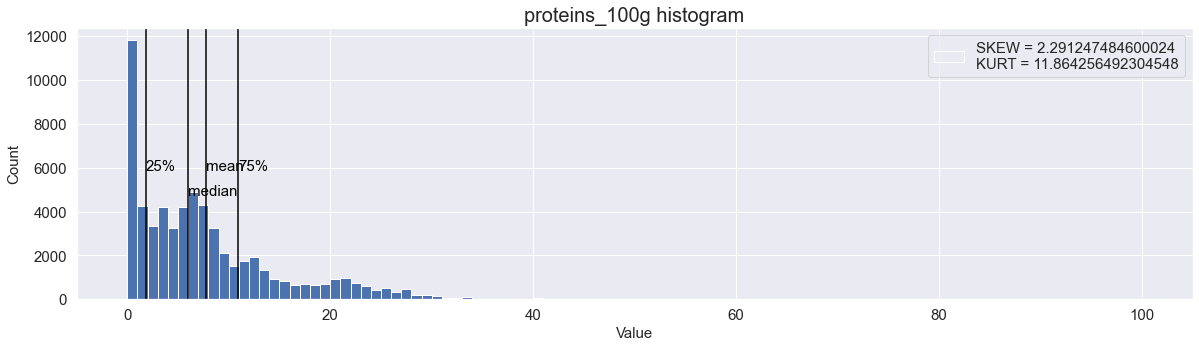

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
sns.set(style="darkgrid")


cpt = 0
for col in quantity_columns:
    fig, ax = plt.subplots(figsize=(20,5))
    values = df_quant[col][~np.isnan(df_quant[col])]
    #sns.histplot(values,kde=True, ax=ax)
    
    y, x, _ = ax.hist(values, bins = 100)
    
    ax.axvline(tab.loc["mean",col], color='black')
    ax.axvline(tab.loc["25%",col], color='black')
    ax.axvline(tab.loc["50%",col], color='black')
    ax.axvline(tab.loc["75%",col], color='black')
    
    ax.text(tab.loc["mean",col], 0.5 * y.max(), 'mean',color='black',fontsize=15)
    ax.text(tab.loc["25%",col], 0.5 * y.max(), '25%',color='black',fontsize=15)
    ax.text(tab.loc["50%",col], 0.4 * y.max(), 'median',color='black',fontsize=15)
    ax.text(tab.loc["75%",col], 0.5 * y.max(), '75%',color='black',fontsize=15)
    
    label = 'SKEW = '+ str(tab.loc["SKEW", col]) + '\n' + 'KURT = '+ str(tab.loc["KURT", col])
    
    red_patch = mpatches.Patch(label=label, fill=False)
    ax.legend(handles=[red_patch], fontsize=15)   

    plt.xlabel('Value', fontsize=15)
    plt.ylabel('Count', fontsize=15)
    plt.title(col+' histogram', fontsize=20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    cpt = cpt + 1

plt.show()

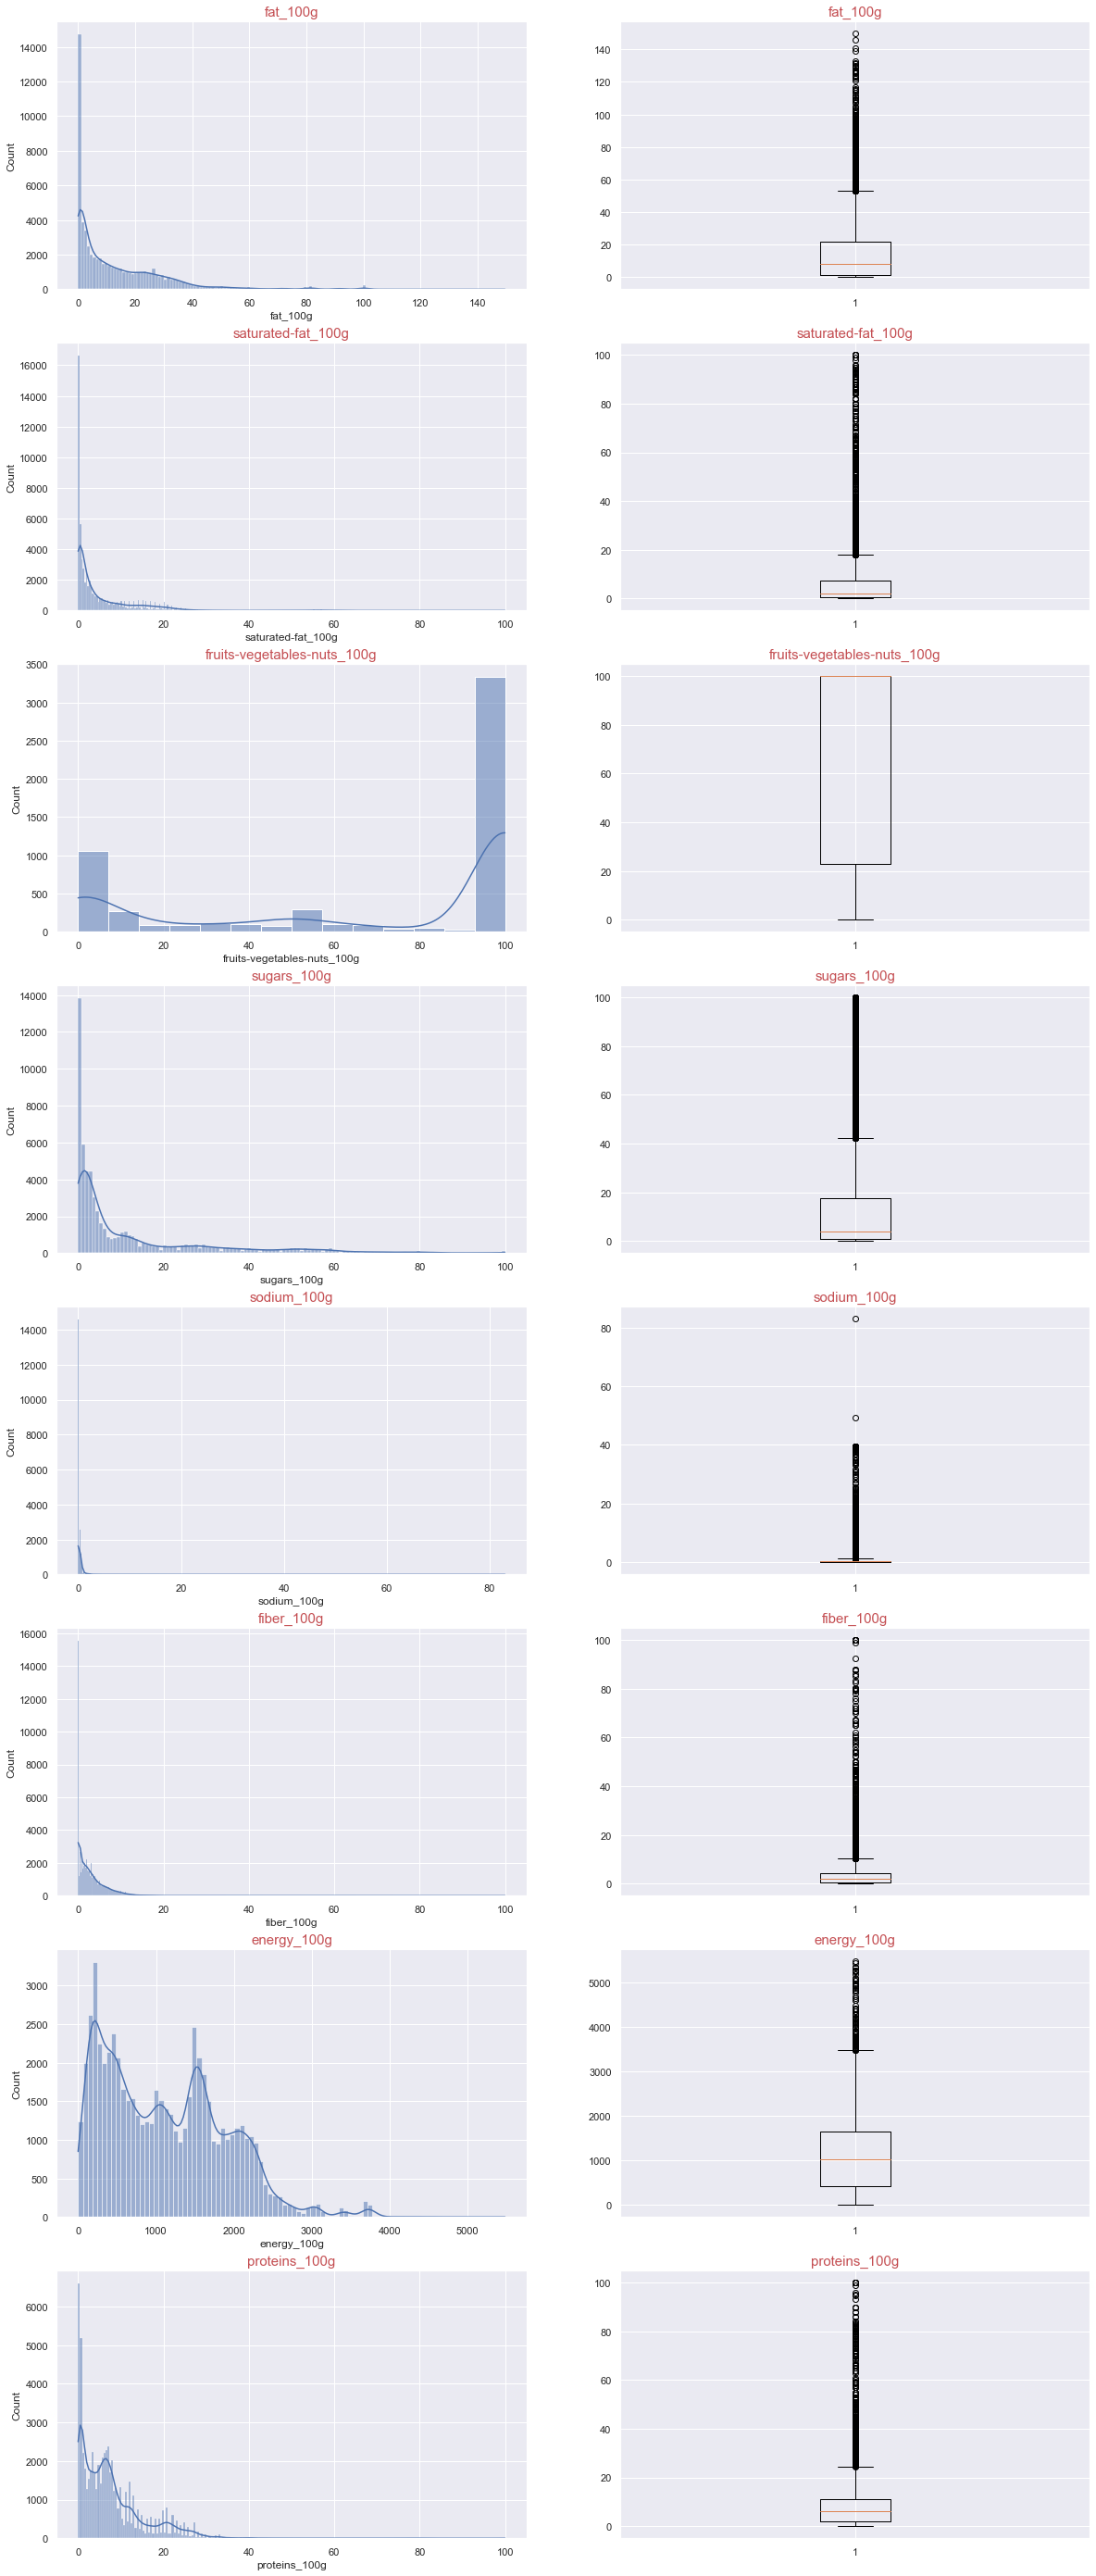

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

fig, axes = plt.subplots(nrows=len(df_quant.columns), ncols=2,figsize=(20,50))
cpt = 0
for col in df_quant.columns:
    values = df_quant[col][~np.isnan(df_quant[col])]
    sns.histplot(values,kde=True, ax=axes[int(cpt), 0])

    axes[int(cpt), 0].set_title(col, fontdict = {
                                 'fontsize': 15,
                                 'color': 'r'
                                })   
    axes[int(cpt), 1].boxplot(values)    
    axes[int(cpt), 1].set_title(col, fontdict = {
                                 'fontsize': 15,
                                 'color': 'r'
                                })
    
    cpt = cpt + 1

plt.show()

# Discrete variables

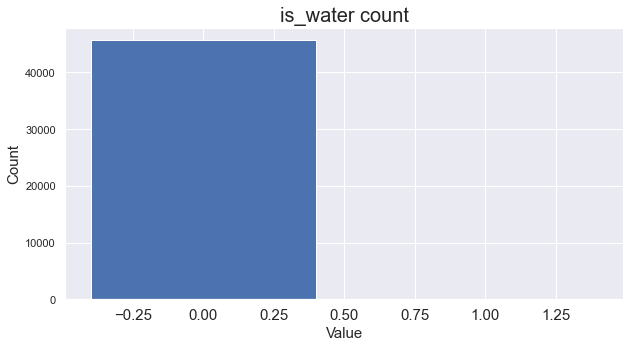

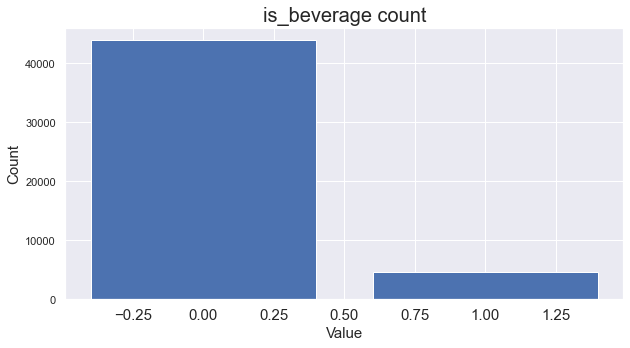

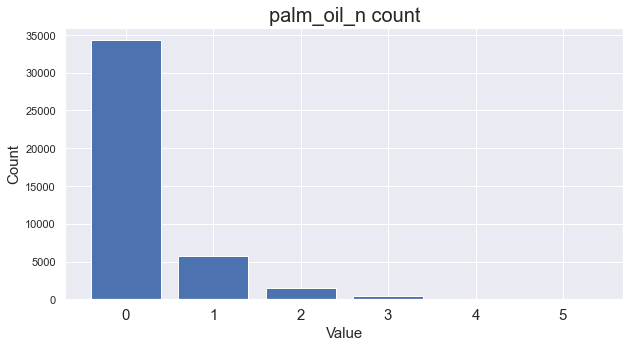

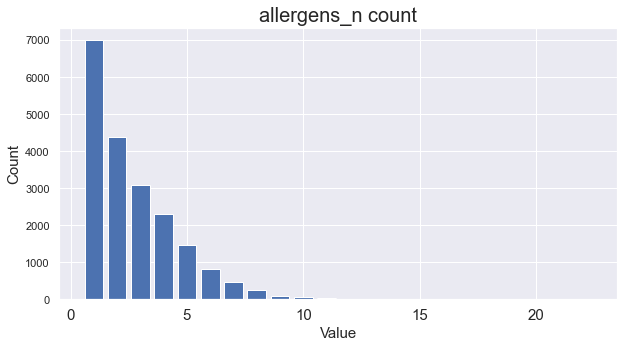

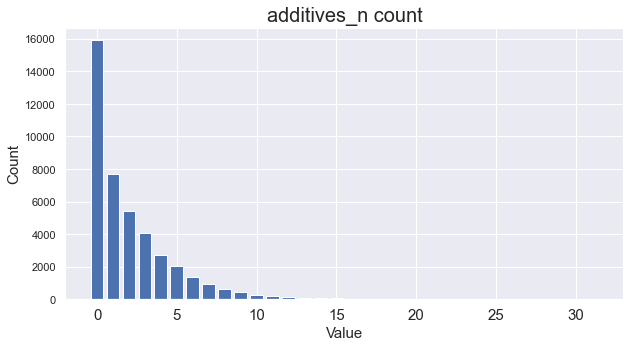

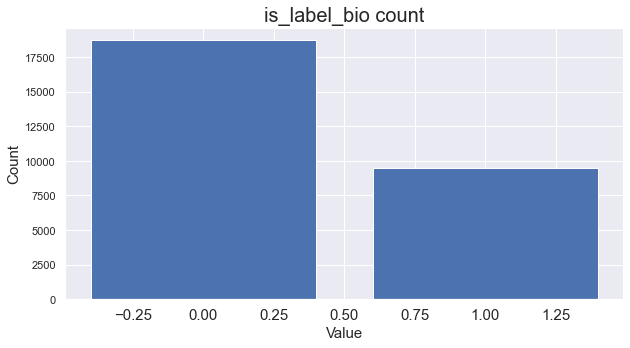

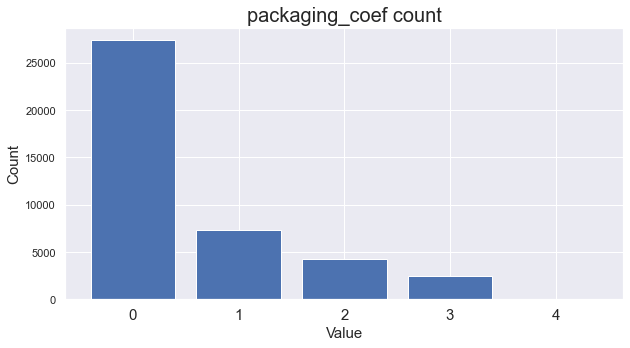

In [85]:
sns.set(style="darkgrid")
 
cpt = 0
for col in created_columns:
    fig, ax = plt.subplots(figsize=(10,5))
    
    ax.bar(df[col].value_counts().index, df[col].value_counts())
    
    cpt=cpt+1
    plt.xlabel('Value', fontsize=15)
    plt.ylabel('Count', fontsize=15)
    plt.title(col+' count', fontsize=20)
    plt.xticks(fontsize=15)

# Categorical variables analysis

In [86]:
df_categorie = df[cat_columns]

def cat_analysis(df, column):
    cat_count = df.groupby(column).size()
    cat_number = len(cat_count)
    cat_articles_number = df[column].count()
    is_imp_cat = cat_count > 100
    imp_cat_nb = cat_count[is_imp_cat].sum()

    print(column, ": the", is_imp_cat.sum(), "biggest categories represent ", \
          imp_cat_nb / cat_articles_number * 100, "% of all the", cat_number, "categories", )

for column in cat_columns:
    cat_analysis(df_categorie, column)

main_category_fr : the 92 biggest categories represent  92.32639117009394 % of all the 1038 categories
main_category : the 92 biggest categories represent  92.32639117009394 % of all the 1038 categories
categories_fr : the 35 biggest categories represent  14.578542802706787 % of all the 11898 categories
categories : the 15 biggest categories represent  5.27122615684471 % of all the 19946 categories
categories_tags : the 35 biggest categories represent  14.578542802706787 % of all the 11898 categories
pnns_groups_1 : the 12 biggest categories represent  99.99793584609668 % of all the 13 categories
pnns_groups_2 : the 34 biggest categories represent  99.6415475258539 % of all the 40 categories
countries : the 7 biggest categories represent  97.26809963776788 % of all the 424 categories
brands : the 63 biggest categories represent  32.61420912388841 % of all the 13052 categories


# Bi-Variate analysis 

## continuous & continuous

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 [Text(0, 0.5, 'fat_100g'),
  Text(0, 1.5, 'saturated-fat_100g'),
  Text(0, 2.5, 'fruits-vegetables-nuts_100g'),
  Text(0, 3.5, 'sugars_100g'),
  Text(0, 4.5, 'sodium_100g'),
  Text(0, 5.5, 'fiber_100g'),
  Text(0, 6.5, 'energy_100g'),
  Text(0, 7.5, 'proteins_100g')])

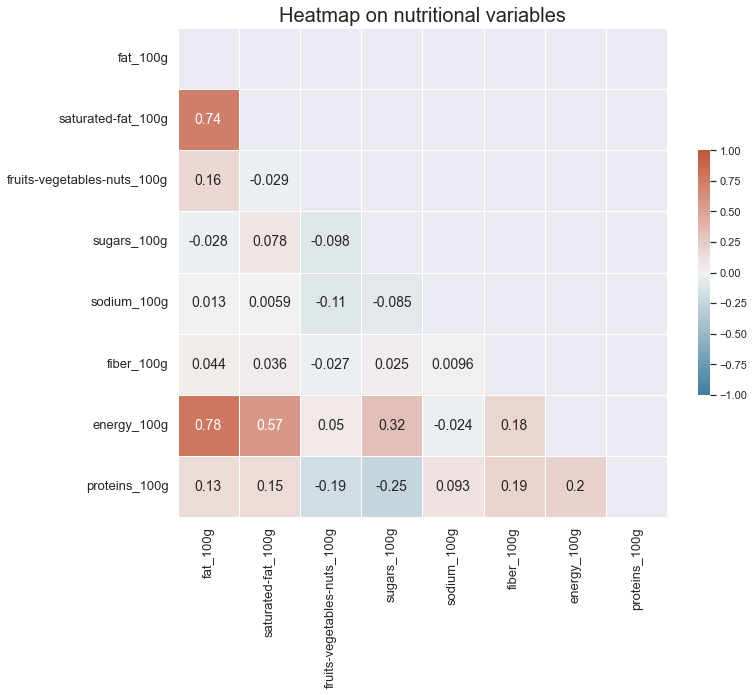

In [87]:
import seaborn as sns

# Continuous & Continuous
#df_quant_wo.plot(x='proteins_100g', y='energy_100g', style='rx')

sns.set_theme(style="darkgrid")
# Compute the correlation matrix
corr = df_quant.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, annot_kws={"size": 14})
plt.title('Heatmap on nutritional variables', fontsize=20)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13,rotation=0)

## Discrete VS discrete

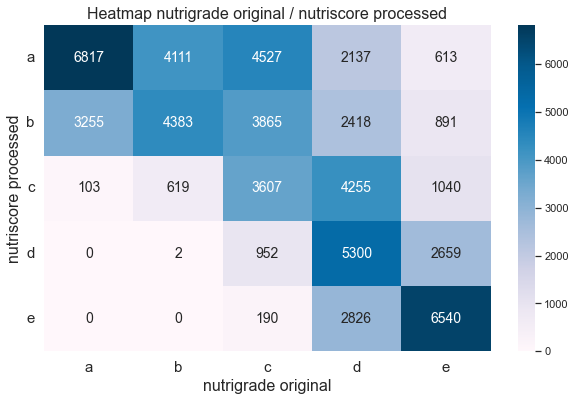

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

# Continuous & Continuous
group_count = df[["nutriscore", "nutrition_grade_fr"]]\
                                .groupby(["nutrition_grade_fr", "nutriscore"]).size().reset_index(name='counts')

pivot = group_count.pivot(index='nutriscore', 
                          columns='nutrition_grade_fr',
                          values='counts')
pivot.fillna(0, inplace=True)
plt.figure(figsize=(10,6))
ax = sns.heatmap(pivot,cmap='PuBu', annot=True, annot_kws={"size": 14}, fmt='.4g')
#c_bar = ax.collections[0].colorbar
#c_bar.set_ticks([-2, 0, 2])

ax.set_xlabel('nutrigrade original', fontsize=16)
ax.set_ylabel('nutriscore processed', fontsize=16)

ax.set_title('Heatmap nutrigrade original / nutriscore processed', fontdict = {
                             'fontsize': 16,
                            })
plt.sca(ax)
plt.yticks(size=15, rotation=0)
plt.xticks(size=15)

plt.show()

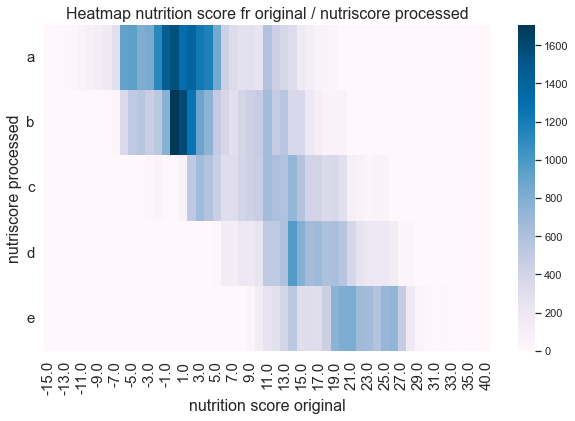

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

# Continuous & Continuous
group_count = df[["nutriscore", "nutrition-score-fr_100g"]]\
                                .groupby(["nutrition-score-fr_100g", "nutriscore"]).size().reset_index(name='counts')

pivot = group_count.pivot(index='nutriscore', 
                          columns='nutrition-score-fr_100g',
                          values='counts')
pivot.fillna(0, inplace=True)

plt.figure(figsize=(10,6))
ax = sns.heatmap(pivot,cmap='PuBu', annot=False, annot_kws={"size": 14},)
#c_bar = ax.collections[0].colorbar
#c_bar.set_ticks([-2, 0, 2])

ax.set_xlabel('nutrition score original', fontsize=16)
ax.set_ylabel('nutriscore processed', fontsize=16)

ax.set_title('Heatmap nutrition score fr original / nutriscore processed', fontdict = {
                             'fontsize': 16,
                            })
plt.sca(ax)
plt.yticks(size=15, rotation=0)
plt.xticks(size=15)

plt.show()

/var/folders/p0/r9j8yslx4_18sgx9jxyw5fmm0000gn/T/ipykernel_1100/1057668642.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nut["nutrition_grade_fr"] = df_nut["nutrition_grade_fr"].map(
/var/folders/p0/r9j8yslx4_18sgx9jxyw5fmm0000gn/T/ipykernel_1100/1057668642.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nut["nutriscore"] = df_nut["nutriscore"].map(


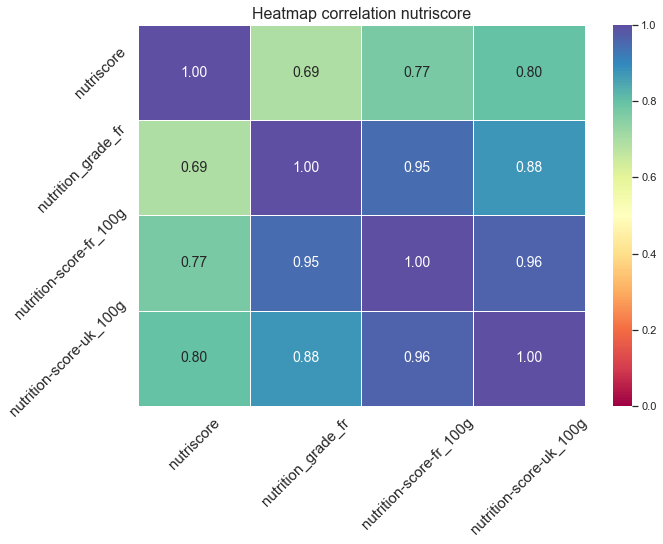

In [103]:
df_nut=df[["nutriscore", 'nutrition_grade_fr', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g']]

#df_nut["nutriscore"] = df_nut["nutriscore"].map(
#                                                    {4:0,3:1,2:2,1:3,0:4})
df_nut["nutrition_grade_fr"] = df_nut["nutrition_grade_fr"].map(
                                                    {'a':0,'b':1,'c':2,'d':3,'e':4})
df_nut["nutriscore"] = df_nut["nutriscore"].map(
                                                    {'a':0,'b':1,'c':2,'d':3,'e':4})
#df_nut["packaging_coef"] = df_nut["packaging_coef"].map(
#                                                    {4:0,3:1,2:2,1:3,0:4})
plt.figure(figsize=(10,7))
ax = sns.heatmap(df_nut.corr(),annot=True,
                 vmax=1, vmin=0, fmt=".2f",
                 cbar=True,cmap="Spectral",
                 linewidth=1, annot_kws={"size": 14})

ax.set_title('Heatmap correlation nutriscore', fontdict = {
                             'fontsize': 16,
                            })
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_yticklabels(), rotation=45)


plt.sca(ax)
plt.yticks(size=15)
plt.xticks(size=15)
plt.show()

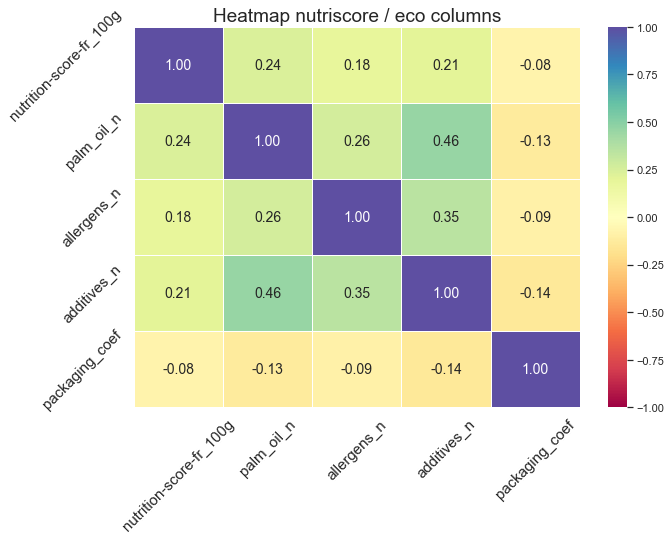

In [104]:
df_nut=df[['nutrition-score-fr_100g',
       'palm_oil_n', 'allergens_n', 'additives_n',
       'is_label_bio', 'packaging_coef']]
plt.figure(figsize=(10,7))
ax = sns.heatmap(df_nut.corr(),annot=True,
                 vmax=1, vmin=-1, fmt=".2f",
                 cbar=True,cmap="Spectral",
                 linewidth=1, annot_kws={"size": 14})

ax.set_title('Heatmap nutriscore / eco columns', fontdict = {
                             'fontsize': 19,
                            })
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_yticklabels(), rotation=45)
plt.sca(ax)
plt.yticks(size=15)
plt.xticks(size=15)
plt.show()

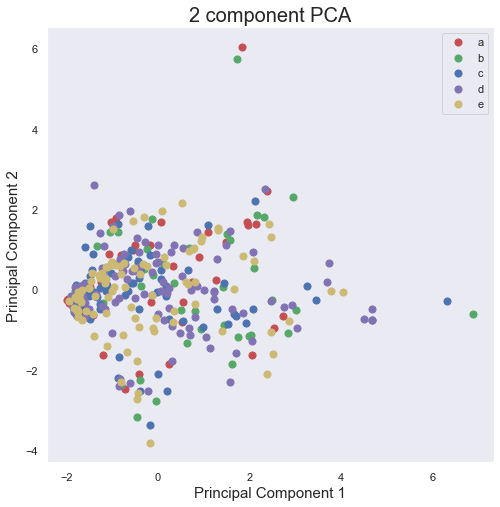

In [92]:
from sklearn.preprocessing import StandardScaler
features = ['fat_100g','saturated-fat_100g', 'sugars_100g',
           'sodium_100g', 'fiber_100g', 'energy_100g', 'proteins_100g']

# Separating out the features
x = df.loc[:, features].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, df[['nutrition_grade_fr']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['a','b','c','d','e']
colors = ['r', 'g', 'b', 'm', 'y']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['nutrition_grade_fr'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

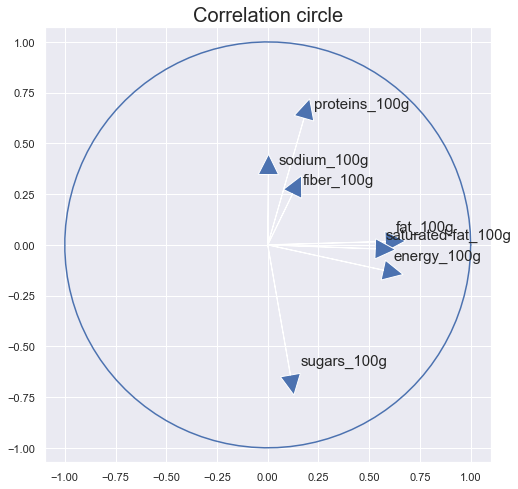

In [111]:
# Plot a variable factor map for the first two dimensions.
(fig, ax) = plt.subplots(figsize=(8, 8))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.1,
             head_length=0.1)

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             features[i], fontsize = 15)


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
ax.set_title('Correlation circle', fontsize = 20)
plt.show()

## Categorical & Categorical

In [93]:
import re

df_cat_nutri = df[["pnns_groups_1", "nutrition_grade_fr"]]

def func(x):
    if pd.notnull(x) and isinstance(x, str):
        return ' '.join(re.split(' |-', x.casefold()))
    else:
        return x

df_cat_nutri["pnns_groups_1"] = df_cat_nutri["pnns_groups_1"].apply(\
                                lambda cat: func(cat))

cat_count = df_cat_nutri.groupby("pnns_groups_1").size()

df_filter = df_cat_nutri[
    df_cat_nutri["pnns_groups_1"].isin(cat_count[cat_count > 100].index)
]

df_filter["nutrition_grade_fr"] = df_filter["nutrition_grade_fr"].map(
                                                    {'a':4,'b':3,'c':2,'d':1,'e':0})

mean_df = df_filter.groupby("pnns_groups_1").mean().sort_values("nutrition_grade_fr")

#mean_df = mean_df.reset_index()
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(mean_df)

                         nutrition_grade_fr
pnns_groups_1                              
sugary snacks                      0.685566
salty snacks                       1.238987
beverages                          1.240535
fat and sauces                     1.256257
fish meat eggs                     1.620346
milk and dairy products            1.801482
unknown                            1.812570
composite foods                    2.597258
cereals and potatoes               3.017997
fruits and vegetables              3.593750


/var/folders/p0/r9j8yslx4_18sgx9jxyw5fmm0000gn/T/ipykernel_1100/2669129226.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat_nutri["pnns_groups_1"] = df_cat_nutri["pnns_groups_1"].apply(\
/var/folders/p0/r9j8yslx4_18sgx9jxyw5fmm0000gn/T/ipykernel_1100/2669129226.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter["nutrition_grade_fr"] = df_filter["nutrition_grade_fr"].map(


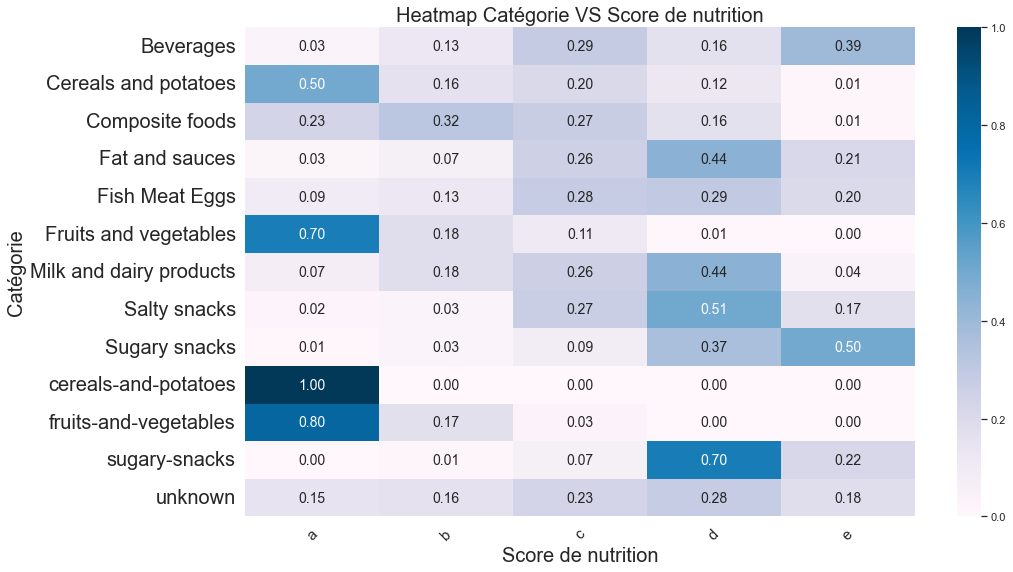

In [105]:
split_number = 10

n = 0
while n < len(mean_df):
    if n + split_number > len(mean_df):
        split_number = len(mean_df) - n
    
    df_tp = df_filter[df_filter["pnns_groups_1"].isin(mean_df[n:n+split_number].index)]
    
    sns.set_theme(style="darkgrid")
    f, ax = plt.subplots(figsize=(15, 9))
    my_order = mean_df[n:n+split_number].index
    
    # Continuous & Continuous
    group_count = df[["pnns_groups_1", "nutrition_grade_fr"]]\
                                .groupby(["nutrition_grade_fr", "pnns_groups_1"]).size().reset_index(name='counts')

    pivot = group_count.pivot(index='pnns_groups_1', 
                          columns='nutrition_grade_fr',
                          values='counts')
    pivot.fillna(0, inplace=True)
    ax = sns.heatmap(pivot.apply(lambda row: row / row.sum(), axis=1),
                     cmap='PuBu', annot=True, annot_kws={"size": 14}, fmt=".2f")

    plt.xticks(rotation=45, fontsize=15)
    plt.yticks(fontsize=20,rotation=0)
    
    plt.ylabel("Catégorie", fontsize=20)
    plt.xlabel("Score de nutrition", fontsize=20)
    
    plt.title('Heatmap Catégorie VS Score de nutrition', fontsize=20)
    plt.show()    
    
    n = n + split_number

## Continuous & Categorical

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

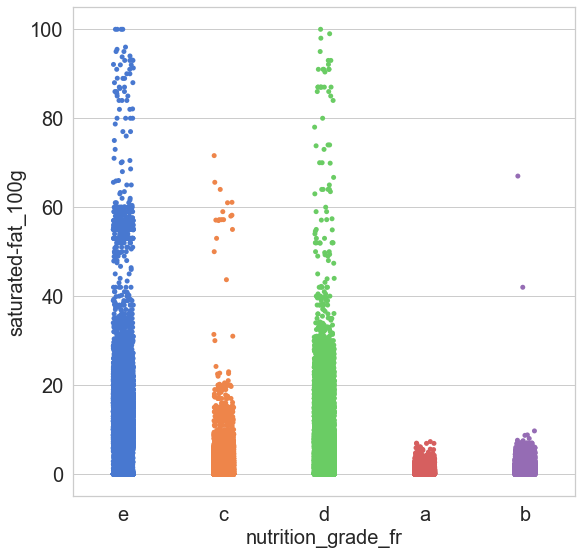

In [95]:
sns.set_theme(style="whitegrid", palette="muted")

# Draw a categorical scatterplot to show each observation
f, ax = plt.subplots(figsize=(9, 9))
ax = sns.stripplot(data=df, x="nutrition_grade_fr", y="saturated-fat_100g")
plt.xlabel("nutrition_grade_fr", fontsize=20)
plt.ylabel("saturated-fat_100g", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

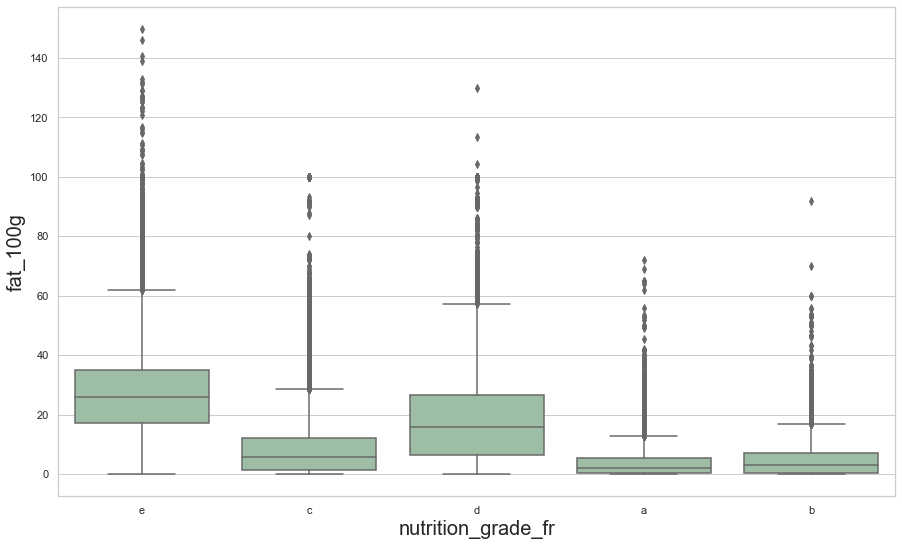

In [96]:
f, ax = plt.subplots(figsize=(15, 9))

ax = sns.boxplot(x='nutrition_grade_fr', y='fat_100g', data=df, color='#99c2a2')
plt.xlabel("nutrition_grade_fr", fontsize=20)
plt.ylabel("fat_100g", fontsize=20)
#ax = sns.swarmplot(x="nutrition_grade_fr", y="saturated-fat_100g", data=df, color='#7d0013')
plt.show()

In [97]:
from bioinfokit.analys import stat
res = stat()

group_min = df.groupby('nutrition_grade_fr')['nutrition_grade_fr'].count().min()

equal_df = pd.DataFrame(columns=df.columns)
for ind in df['nutrition_grade_fr'].unique():
    equal_df = equal_df.append(df[df['nutrition_grade_fr'] == ind][:group_min], ignore_index=True)

df_sel = equal_df[['nutrition_grade_fr', 'fat_100g']].copy()
df_sel.columns = ['grade', 'value']
df_sel["gradeN"] = df_sel["grade"].map(
    {'a':4,'b':3,'c':2,'d':1,'e':0})
res.anova_stat(df=df_sel, res_var='value', anova_model='value ~ C(gradeN)')
print(res.anova_summary)



                df        sum_sq        mean_sq            F  PR(>F)
C(gradeN)      4.0  3.519006e+06  879751.534486  4697.162435     0.0
Residual   45570.0  8.534999e+06     187.294254          NaN     NaN
